In [1]:
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
from func import *
import json
import ast

## GT annotation

In [2]:
# JSON 파일 경로
json_file_path = 'person_keypoints_val2017.json'

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    data = json.load(f)

In [10]:
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [16]:
data['annotations'][0].keys()

dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id'])

In [19]:
data['annotations'][0]['keypoints']

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 142,
 309,
 1,
 177,
 320,
 2,
 191,
 398,
 2,
 237,
 317,
 2,
 233,
 426,
 2,
 306,
 233,
 2,
 92,
 452,
 2,
 123,
 468,
 2,
 0,
 0,
 0,
 251,
 469,
 2,
 0,
 0,
 0,
 162,
 551,
 2]

In [20]:
image_id = []
bbox = []
id = []
gt_keypoints = []

for item in data['annotations']:
    image_id.append(item['image_id'])
    bbox.append(item['bbox'])
    id.append(item['id'])
    gt_keypoints.append(item['keypoints'])

In [21]:
gt_df = pd.DataFrame({'image_id':image_id, 'id': id, 'bbox':bbox, 'gt_keypoints':gt_keypoints})
gt_df

,image_id,id,bbox,gt_keypoints
0,425226,183126,"[73.35, 206.02, 300.58, 372.5]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,440475,183302,"[491.91, 183.51, 34.85, 73.4]","[508, 192, 2, 510, 191, 2, 506, 191, 2, 512, 1..."
2,266400,183830,"[36.32, 0.59, 38.56, 53.86]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,69213,184249,"[276.35, 9.6, 244.69, 400.13]","[389, 97, 2, 405, 82, 2, 376, 80, 2, 434, 85, ..."
4,555050,184327,"[97.1, 185.73, 28.66, 27.72]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
10999,259690,900100259690,"[27, 98, 225, 114]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11000,145020,900100145020,"[27, 201, 209, 68]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11001,562818,900100562818,"[353, 229, 180, 39]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11002,439994,900100439994,"[0, 0, 427, 458]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## model result

In [5]:
# JSON 파일 경로
json_file_path = 'result_keypoints.json'

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    result = json.load(f)

In [6]:
len(result)

6334

In [9]:
result[0].keys()

dict_keys(['category_id', 'center', 'image_id', 'keypoints', 'scale', 'score'])

In [7]:
image_id = []
confidence_score = []
pred_keypoints = []

for item in result:
    image_id.append(item['image_id'])
    confidence_score.append(item['score'])
    pred_keypoints.append(item['pred_keypoints'])

In [8]:
result_df = pd.DataFrame({'image_id':image_id,'center':center,'scale':scale,'score':score})
result_df

,image_id,center,scale,score
0,397133,"[442.864990234375, 208.22999572753906]","[1.2966562509536743, 1.7288750410079956]",0.856345
1,397133,"[30.579999923706055, 280.69500732421875]","[0.38224998116493225, 0.5096666812896729]",0.397612
2,252219,"[361.3999938964844, 272.68499755859375]","[0.919921875, 1.2265625]",0.895720
3,252219,"[70.26000213623047, 279.7850036621094]","[1.056796908378601, 1.409062385559082]",0.895242
4,252219,"[571.77001953125, 278.6499938964844]","[1.0066875219345093, 1.3422499895095825]",0.829179
...,...,...,...,...
6329,15335,"[286.7699890136719, 99.50499725341797]","[0.6165000200271606, 0.8219999670982361]",0.508098
6330,15335,"[533.0349731445312, 99.5199966430664]","[0.601312518119812, 0.8017499446868896]",0.415471
6331,15335,"[426.94000244140625, 109.0199966430664]","[1.0413750410079956, 1.3884999752044678]",0.396422
6332,15335,"[198.88499450683594, 108.5250015258789]","[0.48118752241134644, 0.6415833234786987]",0.294983


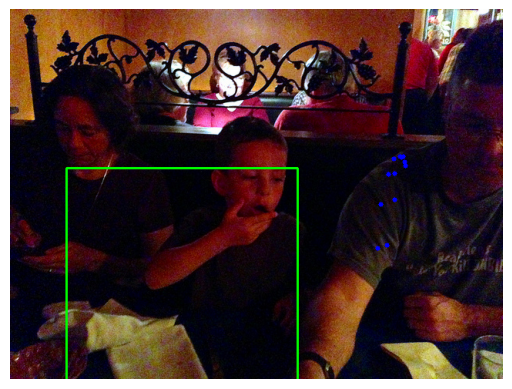

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_keypoints(image, bbox, keypoints):
    # Convert COCO keypoint format to (x, y, visibility) triples
    keypoints = np.array(keypoints).reshape(-1, 3)

    # Draw bounding box
    bbox = [int(coord) for coord in bbox]
    cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 2)

    # Draw keypoints
    for i, (x, y, visibility) in enumerate(keypoints):
        if visibility == 2:  # Check if the keypoint is visible
            cv2.circle(image, (int(x), int(y)), 3, (255, 0, 0), -1)

    # Display the image
    plt.imshow(image[:, :, ::-1])
    plt.axis('off')
    plt.show()

# Example usage
image_path = 'val2017/000000015335.jpg'  # Replace with the actual path to your image
image = cv2.imread(image_path)
bbox = [73, 206, 300, 372]  # Replace with the actual bounding box values
keypoints = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 508, 192, 2, 510, 191, 2, 506, 191, 2, 512, 198, 2, 498, 194, 2, 513, 203, 2, 499, 213, 2, 491, 214, 2, 499, 247, 2, 481, 253, 2, 489, 306, 2, 477, 310, 2]  # Replace with the actual keypoint values

visualize_keypoints(image, bbox, keypoints)

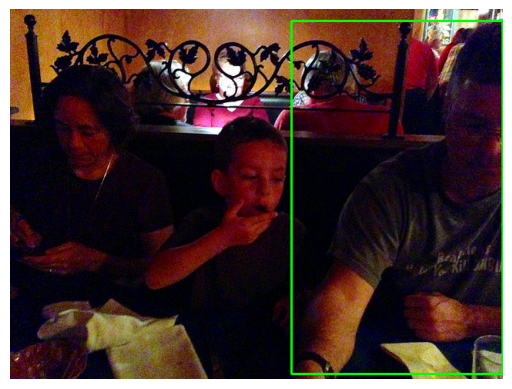

In [33]:
def visualize_keypoints(image, bbox, keypoints):
    # Convert COCO keypoint format to (x, y, visibility) triples
    keypoints = np.array(keypoints).reshape(-1, 3)

    # Draw bounding box
    bbox = [int(coord) for coord in bbox]
    cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 2)

    # Draw keypoints relative to the bounding box
    for i, (x, y, visibility) in enumerate(keypoints):
        if visibility == 2:  # Check if the keypoint is visible
            # Convert keypoint coordinates to absolute image coordinates
            keypoint_x = int(x + bbox[0])
            keypoint_y = int(y + bbox[1])
            cv2.circle(image, (keypoint_x, keypoint_y), 3, (255, 0, 0), -1)

    # Display the image
    plt.imshow(image[:, :, ::-1])
    plt.axis('off')
    plt.show()

# Example usage
# Assume df is your DataFrame containing the data
selected_image_id = 15335  # Replace with the image_id you want to visualize
selected_row = gt_df[gt_df['image_id'] == selected_image_id].iloc[0]

# image_path = 'path/to/your/images/' + str(selected_image_id) + '.jpg'  # Adjust the path to your image directory
image_path = 'val2017/000000015335.jpg'
image = cv2.imread(image_path)
bbox = selected_row['bbox']
keypoints = selected_row['gt_keypoints']

visualize_keypoints(image, bbox, keypoints)